<a href="https://colab.research.google.com/github/stefano-bosio/CTF_ML_MD/blob/main/Feature_Selection_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [184]:
!pip install rdkit
!pip install bussilab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 10.0 MB/s eta 0:00:00
  Created wheel for bussilab: filename=bussilab-0.0.45-py3-none-any.whl size=58965 sha256=ec9b6ddd675016884fd00f353b114922267f5f1444efb356fc3497bd4a943faf
  Stored in directory: /root/.cache/pip/wheels/c0/d0/66/d6c6fed1023f4fe805d2a617072f2b25f76831a1a164da5c19
Successfully built bussilab


In [185]:
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the database

In [186]:
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
!wget https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi

--2024-03-18 21:37:12--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/kinase-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145220 (142K) [text/plain]
Saving to: ‘kinase-examples.smi.3’

kinase-examples.smi 100%[===================>] 141.82K  --.-KB/s    in 0.01s   

2024-03-18 21:37:12 (10.6 MB/s) - ‘kinase-examples.smi.3’ saved [145220/145220]

--2024-03-18 21:37:12--  https://raw.githubusercontent.com/stefano-bosio/CTF_ML_MD/main/lgic-examples.smi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [243]:
suppl_kinases=rdkit.Chem.rdmolfiles.SmilesMolSupplier('kinase-examples.smi')
kinases=[x for x in suppl_kinases]

In [244]:
suppl_lgic=rdkit.Chem.rdmolfiles.SmilesMolSupplier('lgic-examples.smi')
lgic=[x for x in suppl_lgic]

In [150]:
features_kinases=pd.DataFrame()
for i,mol in enumerate(kinases):
    features_kinases.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_kinases.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_kinases.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_kinases.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features_kinases.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_kinases.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_kinases.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_kinases.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_kinases.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_kinases.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_kinases.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_kinases.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_kinases.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_kinases.loc[i,'set']=0

In [151]:
features_kinases

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,493.615,7.0,2.0,7.0,8.0,0.241379,5.0,86.28,0.0,0.0,4.0,1.0,0.0
1995,539.592,9.0,2.0,8.0,10.0,0.200000,5.0,120.50,0.0,0.0,5.0,0.0,0.0
1996,524.691,8.0,3.0,10.0,10.0,0.407407,4.0,108.48,0.0,0.0,3.0,1.0,0.0
1997,527.669,6.0,2.0,7.0,8.0,0.354839,5.0,80.65,0.0,0.0,4.0,1.0,0.0


In [152]:
features_lgic=pd.DataFrame()
for i,mol in enumerate(lgic):
    features_lgic.loc[i,'MolWt']=Descriptors.MolWt(mol)
    features_lgic.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
    features_lgic.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_lgic.loc[i,'NumRotafeaturescBonds']=Descriptors.NumRotatableBonds(mol)
    features_lgic.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
    features_lgic.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    features_lgic.loc[i,'RingCount']=Descriptors.RingCount(mol)
    features_lgic.loc[i,'TPSA']=Descriptors.TPSA(mol)
    features_lgic.loc[i,'Stereocenters']=rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(mol)
    features_lgic.loc[i,'Spiro']=rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(mol)
    features_lgic.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
    features_lgic.loc[i,'NumArR']=Descriptors.NumAromaticRings(mol)
    features_lgic.loc[i,'NumAliR']=Descriptors.NumAliphaticRings(mol)
    features_lgic.loc[i,'set']=1

In [153]:
features_lgic

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,682.396,4.0,2.0,7.0,15.0,0.391304,2.0,92.34,0.0,0.0,2.0,0.0,1.0
1,650.398,3.0,2.0,7.0,13.0,0.391304,2.0,58.20,0.0,0.0,2.0,0.0,1.0
2,249.683,4.0,2.0,3.0,9.0,0.333333,1.0,92.45,0.0,0.0,1.0,0.0,1.0
3,255.665,3.0,1.0,3.0,8.0,0.333333,2.0,83.66,0.0,0.0,1.0,1.0,1.0
4,261.694,4.0,1.0,3.0,9.0,0.428571,2.0,83.66,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


In [154]:
features=pd.concat((features_kinases,features_lgic))

In [155]:
features

,MolWt,NumHAcceptors,NumHDonors,NumRotafeaturescBonds,NumHeteroatoms,FractionCSP3,RingCount,TPSA,Stereocenters,Spiro,NumArR,NumAliR,set
0,398.482,3.0,3.0,7.0,7.0,0.363636,3.0,77.23,0.0,0.0,2.0,1.0,0.0
1,249.335,4.0,0.0,3.0,4.0,0.307692,2.0,29.54,0.0,0.0,1.0,1.0,0.0
2,442.491,5.0,4.0,6.0,9.0,0.391304,4.0,106.69,1.0,0.0,2.0,2.0,0.0
3,358.445,4.0,2.0,6.0,5.0,0.181818,4.0,76.82,1.0,0.0,4.0,0.0,0.0
4,332.407,3.0,2.0,3.0,5.0,0.200000,4.0,61.02,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,296.301,2.0,2.0,4.0,5.0,0.058824,3.0,61.96,0.0,0.0,3.0,0.0,1.0
1736,342.380,7.0,0.0,3.0,8.0,0.250000,3.0,76.79,0.0,0.0,2.0,1.0,1.0
1737,397.934,6.0,1.0,5.0,9.0,0.066667,3.0,71.95,0.0,0.0,3.0,0.0,1.0
1738,292.338,2.0,2.0,4.0,4.0,0.111111,3.0,61.96,1.0,0.0,3.0,0.0,1.0


# Scaling of variables

In [156]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [157]:
feature_scaled=pd.DataFrame(MinMaxScaler().fit_transform(features), columns=features.columns)

# 1. Univariate Linear Filtering

In [158]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression

In [159]:
array = feature_scaled.values

In [160]:
X = array[:,0:12]
Y = array[:,12]
feat=features.columns

In [161]:
X.shape

(3739, 12)

In [162]:
Y.shape

(3739,)

In [163]:
# chi2 to select the best k=..
test = SelectKBest(score_func=chi2, k=3)
#test = SelectKBest(score_func=mutual_info_regression, k=3)
fit = test.fit(X, Y)

In [164]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 78.273  33.732   3.769  22.347  25.176 103.474  72.327   6.551  72.74
  37.349 244.248   5.35 ]


In [165]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

So, the **k(=3) best ones** seems to be: **NumArR, FractionCSP3, and MolWt**

## 2. Wrapping through Recursive Feature Elimination

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [167]:
#model = LogisticRegression()
model = LogisticRegression(solver='lbfgs', max_iter=5000)
#rfe = RFE(model, 3)    # this started to give error in recent sklearn versions
rfe = RFE(model, n_features_to_select=3)   # my choice: seek for 3 features
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False False False False False  True False  True False]
Feature Ranking: [ 5  1  3 10  7  6  2  4  1  8  1  9]


In [168]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

You can see that RFE has chosen the **top 3 features** as **NumHAcceptors, Stereocenters, NumArR**.

# 3. Feature Importance

In [169]:
from sklearn.ensemble import ExtraTreesClassifier

In [170]:
# Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.113 0.084 0.062 0.047 0.078 0.109 0.103 0.082 0.049 0.004 0.234 0.035]


In [171]:
feat[:-1]

Index(['MolWt', 'NumHAcceptors', 'NumHDonors', 'NumRotafeaturescBonds',
       'NumHeteroatoms', 'FractionCSP3', 'RingCount', 'TPSA', 'Stereocenters',
       'Spiro', 'NumArR', 'NumAliR'],
      dtype='object')

**The larger the score, the more important the attribute**. The scores suggest at the importance of **NumArR, MolWt, and RingCount**.

# Principal Component Analysis

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca=PCA()

In [174]:
low_dim=pca.fit_transform(X)

In [175]:
low_dim.shape

(3739, 12)

In [176]:
low_dim[:,0].shape

(3739,)

<BarContainer object of 12 artists>

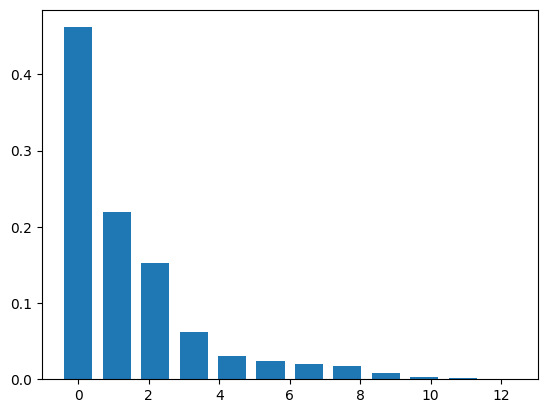

In [177]:
plt.bar(np.linspace(0,len(pca.explained_variance_ratio_), num=len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

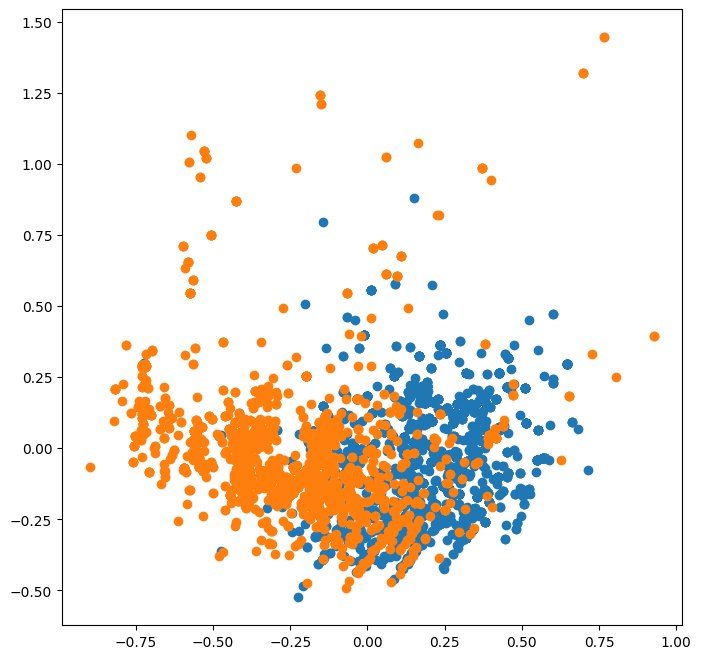

In [178]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:1999,0], low_dim[:1999,1])
plt.scatter(low_dim[2000:,0], low_dim[2000:,1])

In [179]:
low_dim

array([[-4.827e-02,  1.253e-02,  9.533e-02, ...,  9.071e-03, -9.884e-03,
         3.080e-16],
       [-2.769e-01, -2.057e-01, -4.756e-02, ..., -3.020e-02, -2.120e-03,
         2.627e-16],
       [-5.093e-05,  1.834e-01,  8.453e-02, ..., -9.202e-03, -7.315e-03,
        -3.015e-16],
       ...,
       [ 2.188e-01, -2.072e-01,  6.630e-02, ..., -1.526e-02, -2.564e-02,
         1.832e-17],
       [ 9.583e-02, -2.735e-01, -2.566e-03, ...,  1.518e-02,  2.658e-03,
        -1.540e-17],
       [-7.079e-01, -8.518e-02,  1.397e-01, ...,  2.245e-02,  8.650e-03,
         3.025e-17]])

In [187]:
from sklearn.cluster import *

In [188]:
kmeans=KMeans(n_clusters=16,random_state=42).fit(low_dim[:,:2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [189]:
np.unique(kmeans.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)

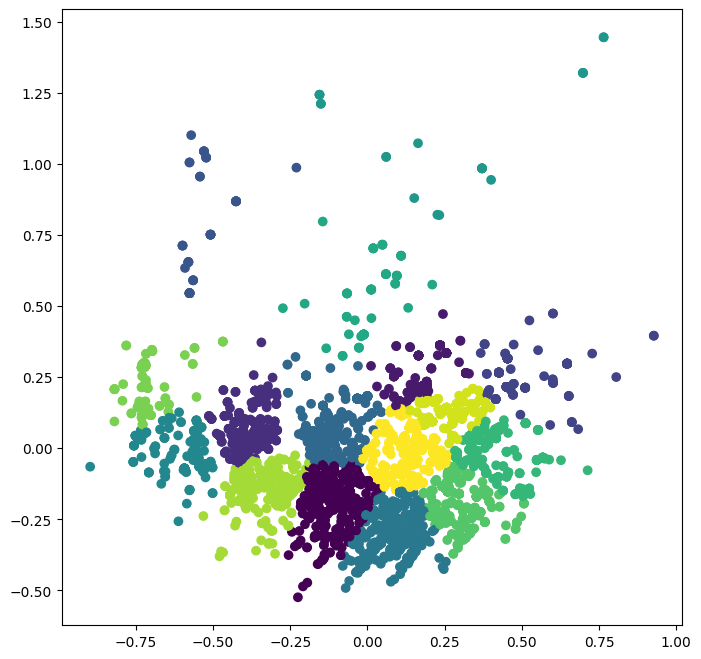

In [190]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:,0], low_dim[:,1],c=kmeans.labels_)


In [195]:
from bussilab.clustering import daura
from sklearn.metrics import pairwise_distances

In [230]:
adj=pairwise_distances(low_dim[:,:2],low_dim[:,:2])

In [231]:
clustering=daura(adj<0.25)

In [232]:
len(clustering["clusters"])

24

In [233]:
# find centroids, taken from: https://mdtraj.org/1.9.3/examples/centroids.html
centroids=[]
for i in range(len(clustering["clusters"])):
    cl=clustering.clusters[i]
    distances = np.empty((len(cl), len(cl)))
    for j in range(len(cl)):
        for k in range(len(cl)):
            distances[j,k] = adj[cl[j],cl[k]]

    beta = 1
    index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
    centroids.append(cl[index])

<ipython-input-233-8b4c0f449714>:11: RuntimeWarning: invalid value encountered in divide
  index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()


In [234]:
centroids

[1618,
 2131,
 2050,
 2703,
 3127,
 14,
 5,
 3319,
 2531,
 2010,
 2676,
 91,
 2042,
 461,
 316,
 2171,
 2477,
 2617,
 95,
 1373,
 1860,
 1824,
 2468,
 2482]

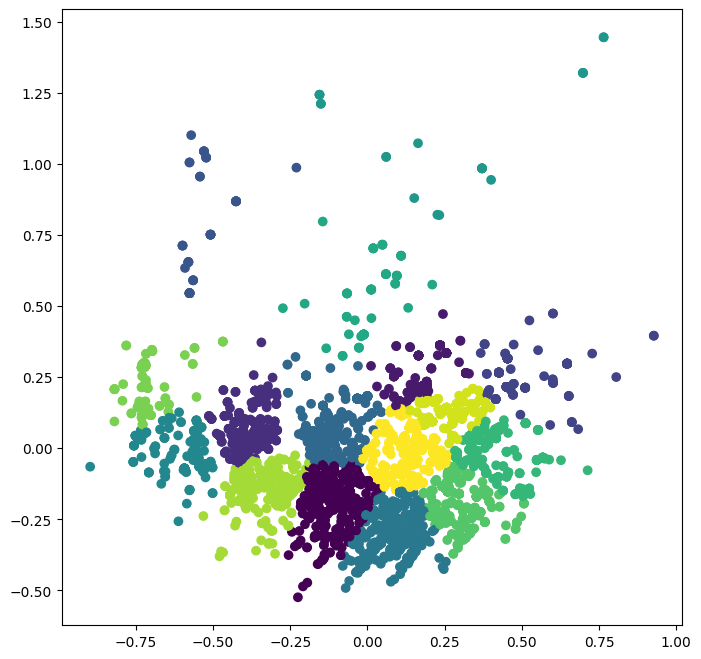

In [236]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:,0], low_dim[:,1],c=kmeans.labels_)
#plt.scatter(low_dim[centroids,0], low_dim[centroids,1],marker="*",s=100, edgecolor="black")


In [246]:
tot=kinases+lgic

In [247]:
len(tot)

3739

In [237]:
from sklearn.metrics import pairwise_distances_argmin_min

In [238]:
closest_points= pairwise_distances_argmin_min(kmeans.cluster_centers_, low_dim[:,:2])
closest_points

(array([2499,  476, 2219, 1148, 2061, 1483, 1305, 2096, 2808,  650, 3451,
         345, 2238, 3705,   16, 1248]),
 array([0.005, 0.021, 0.007, 0.043, 0.041, 0.007, 0.002, 0.015, 0.115,
        0.035, 0.03 , 0.009, 0.009, 0.006, 0.01 , 0.003]))

In [239]:
low_dim[closest_points[0],1].shape

(16,)

In [240]:
low_dim[closest_points[0],1]

array([-0.194,  0.281,  0.06 ,  0.227,  0.752,  0.08 , -0.292, -0.005,
        1.073,  0.559,  0.014, -0.196,  0.229, -0.133,  0.142, -0.012])

In [241]:
low_dim[closest_points[0],0]

array([-0.105,  0.207, -0.401,  0.474, -0.508, -0.095,  0.092, -0.625,
        0.164,  0.012,  0.392,  0.296, -0.719, -0.314,  0.257,  0.128])

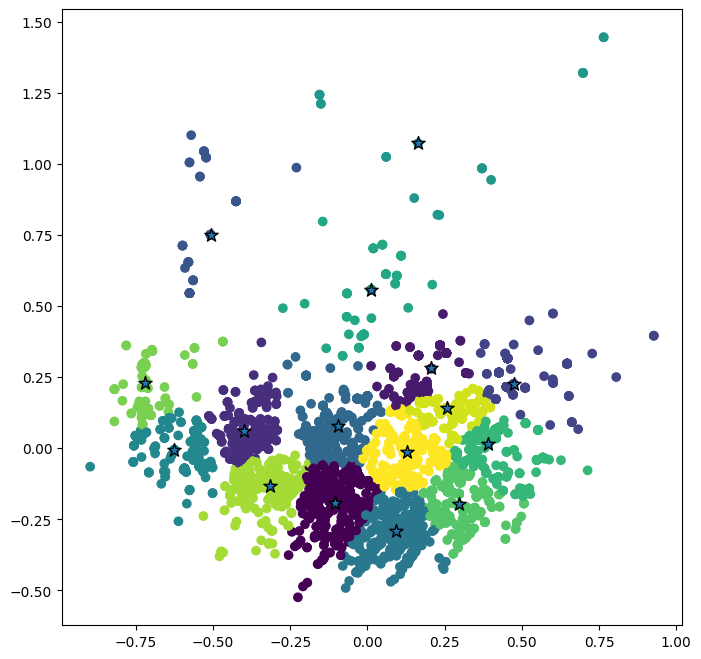

In [242]:
plt.figure(figsize=(8,8))
plt.scatter(low_dim[:,0], low_dim[:,1],c=kmeans.labels_)
plt.scatter(low_dim[closest_points[0],0], low_dim[closest_points[0],1],marker='*',s=100,edgecolor="black")

In [253]:
subset=[]
for i in closest_points[0]:
  subset.append(tot[i])

In [254]:
subset

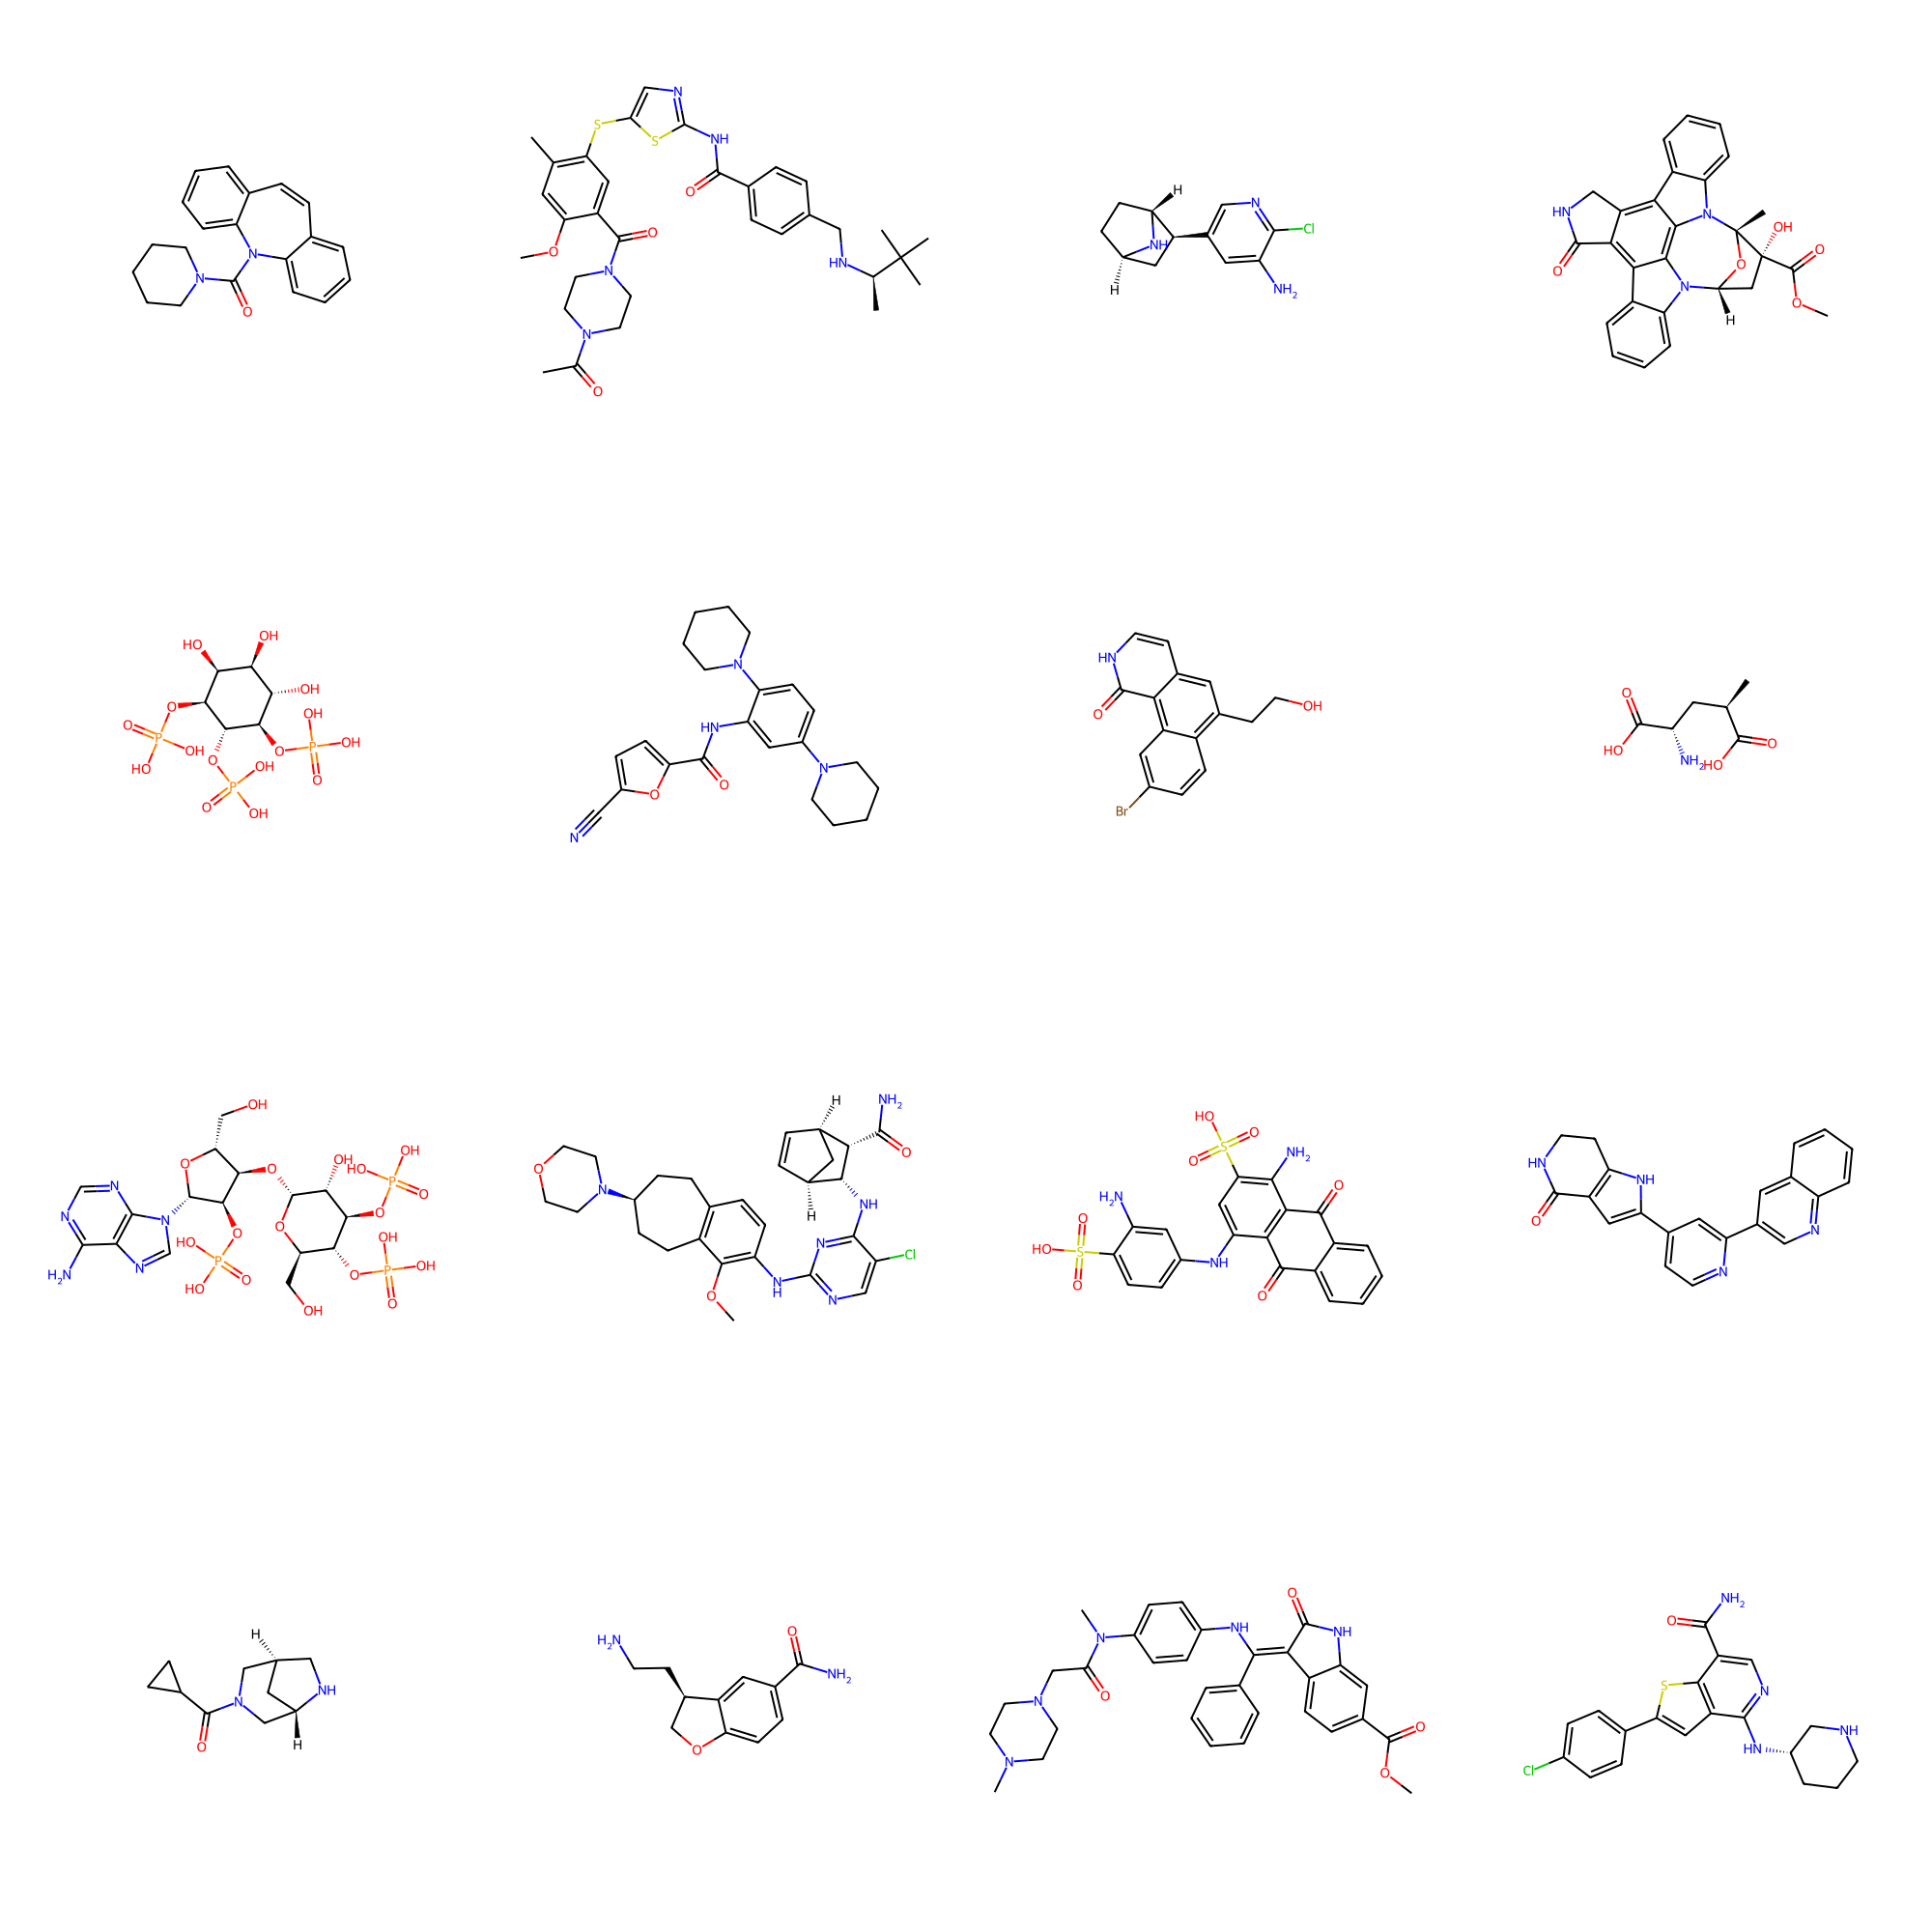

In [255]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=4,subImgSize=(500,500))
img

# Non-linear dimensionality reducion methods

In [270]:
from sklearn.manifold import Isomap

In [297]:
iso=Isomap(n_neighbors=12)

In [298]:
data_red=iso.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


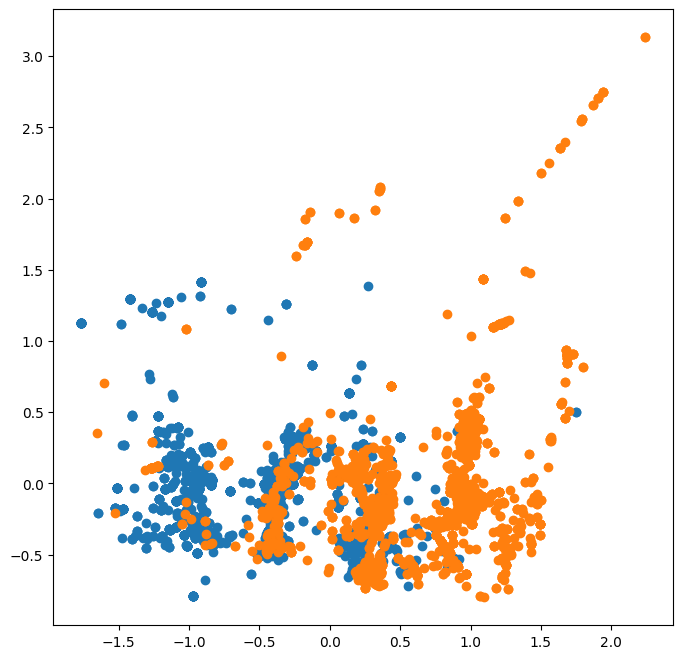

In [299]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:1999,0], data_red[:1999,1])
plt.scatter(data_red[2000:,0], data_red[2000:,1])

In [300]:
from sklearn.manifold import  *

In [301]:
tsne=TSNE(perplexity=np.sqrt(len(X)))

In [302]:
data_red=tsne.fit_transform(X)

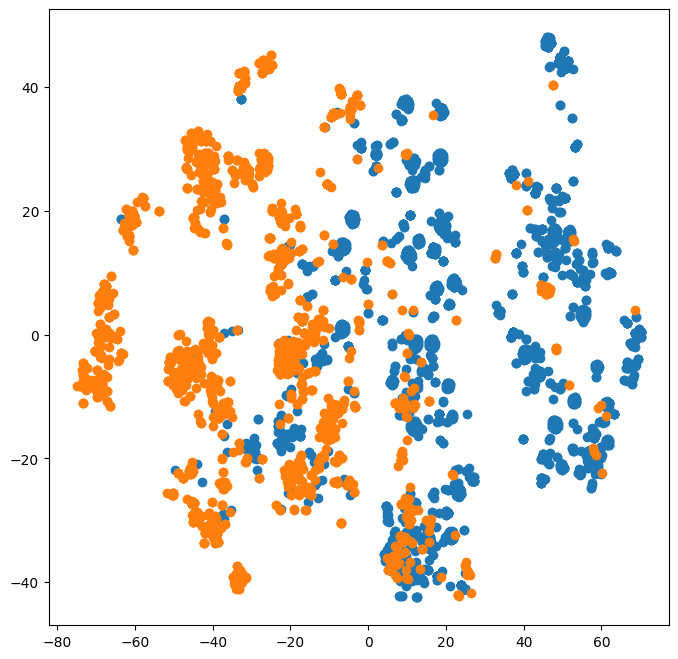

In [306]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:2000,0], data_red[:2000,1])
plt.scatter(data_red[2000:,0], data_red[2000:,1])

In [307]:
kmeans=KMeans(n_clusters=16,random_state=42).fit(data_red[:,:2])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [308]:

np.unique(kmeans.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)

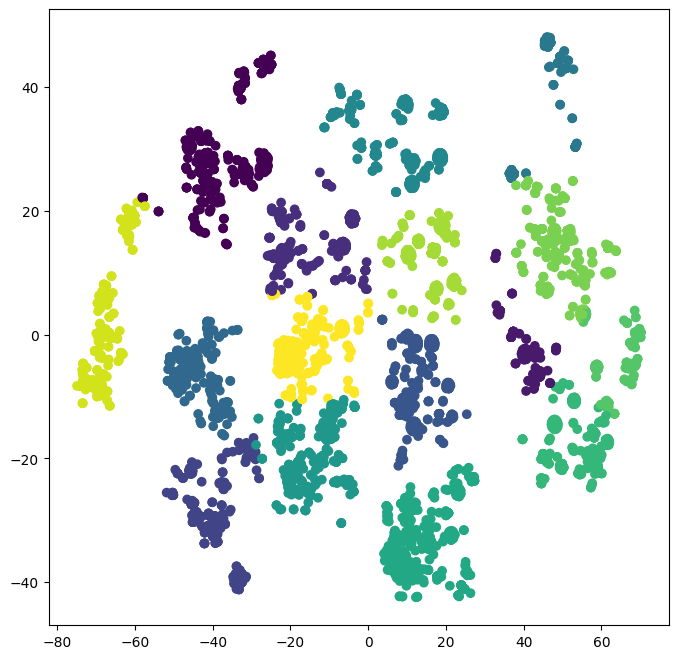

In [310]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)

In [313]:
closest_points= pairwise_distances_argmin_min(kmeans.cluster_centers_, data_red[:,:2])
closest_points


(array([3546,  484, 2590, 2927, 1170, 3122, 2009,   12,  120, 1482, 1252,
        1392,  393,  314, 2030, 3474]),
 array([1.685, 0.575, 2.471, 0.723, 0.332, 0.253, 1.295, 1.085, 0.524,
        0.353, 1.057, 1.909, 0.84 , 0.997, 0.485, 0.866]))

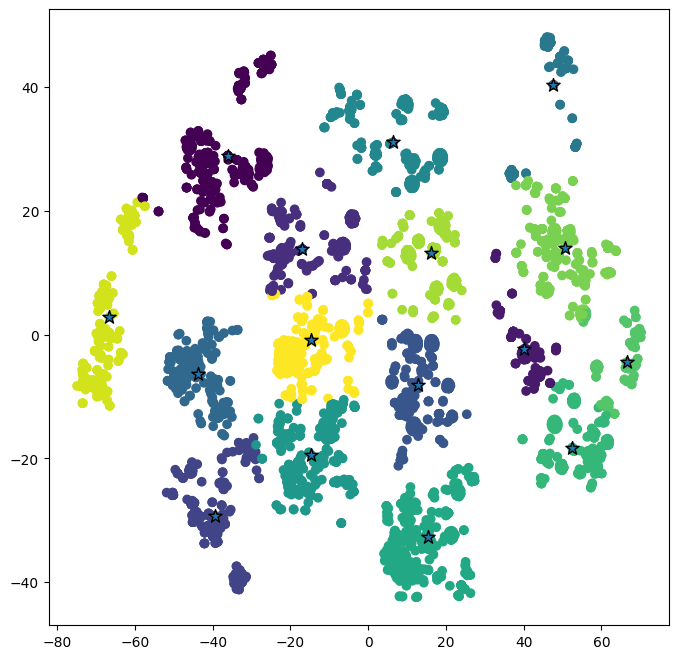

In [314]:
plt.figure(figsize=(8,8))
plt.scatter(data_red[:,0], data_red[:,1],c=kmeans.labels_)
plt.scatter(data_red[closest_points[0],0], data_red[closest_points[0],1],marker='*',s=100,edgecolor="black")

In [315]:

subset=[]
for i in closest_points[0]:
  subset.append(tot[i])


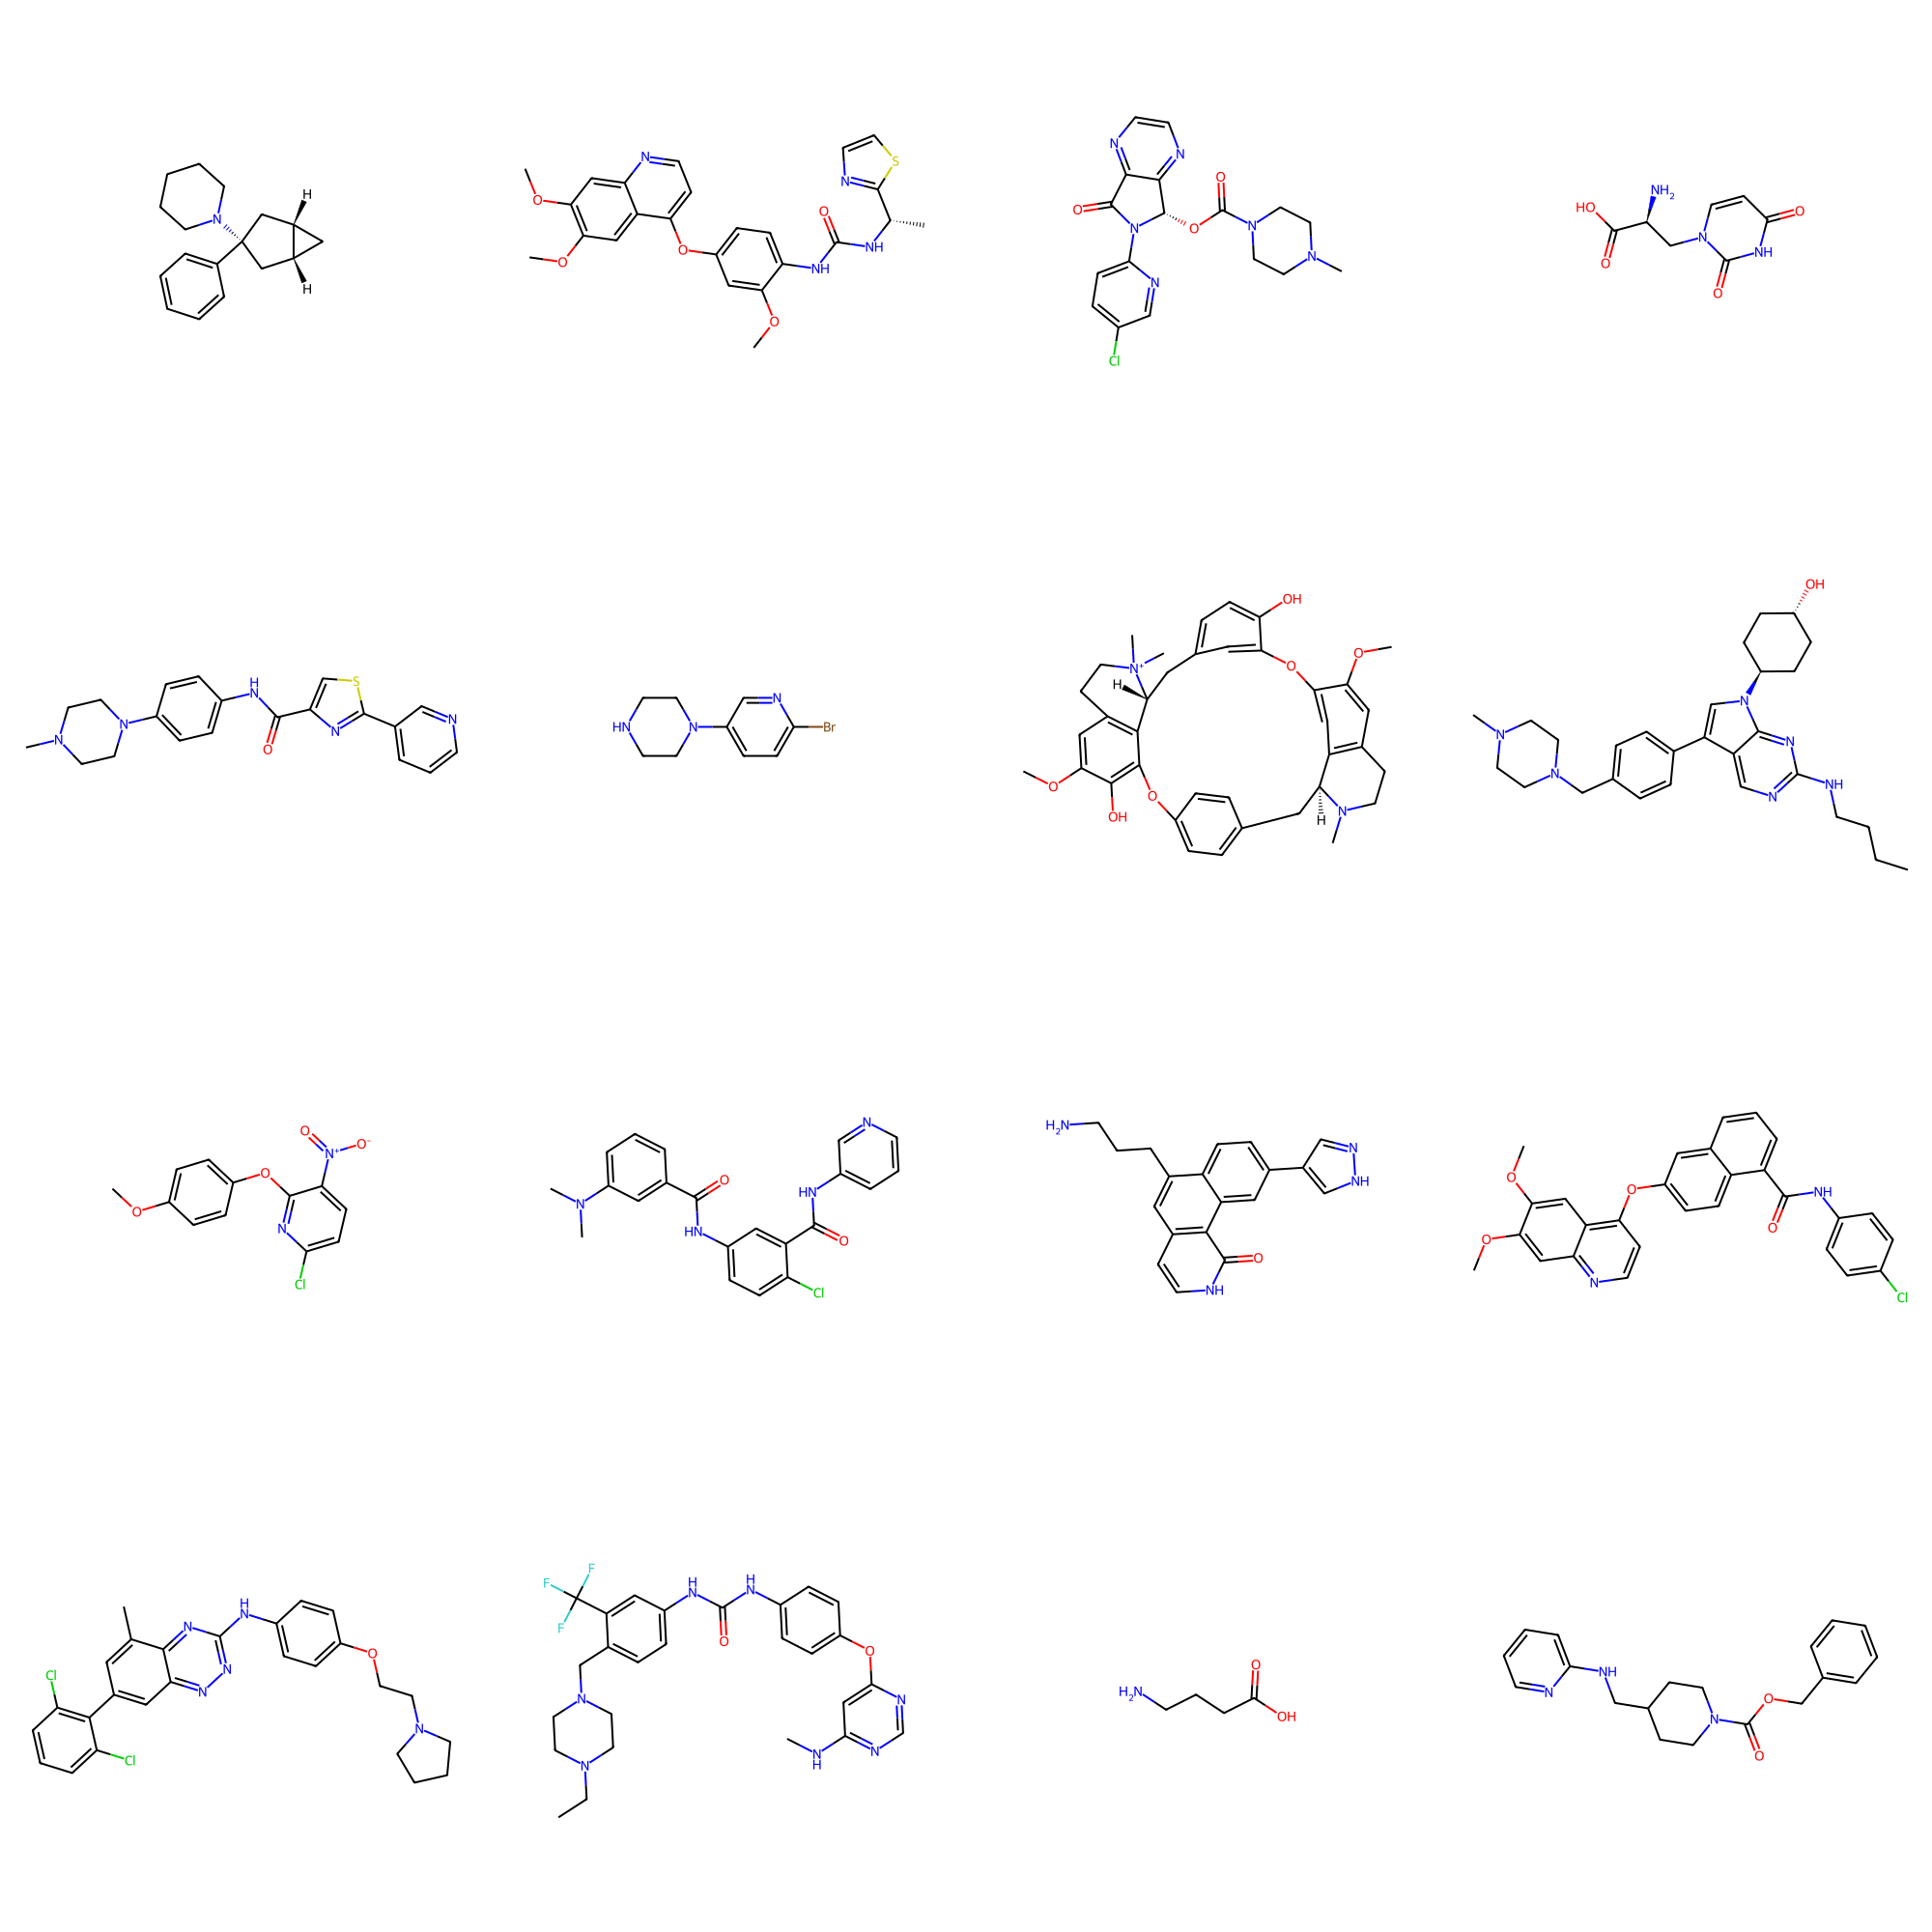

In [316]:
img=rdkit.Chem.Draw.MolsToGridImage(subset,molsPerRow=4,subImgSize=(500,500))
img